# Statistical and visual exploration of Indeed dataset for the purpose of building an NLP project for building skillset versus salary model

1. Abstract

    This is phase 2 of two part course work where we are performing Exploratory Data Analysis(EDA) on previously obtained data from Indeed website. Several Python libraries such as Pandas, Numpy, Matplotlib, Seaborn, NLTK are utilised and some of the findings are displayed in wordcloud visual.

2. Introduction

    Data procurement, cleaning and exploration are typical start of any Machine Learning project. This particular project is an NLP project split into two phases. Phase one, involved gathering data from online job boards and performing various data wrangling steps to clean the data using Python libraries such as Pandas, Numpy etc. Phase one was completed on 05 July 2021 as part of Course Work 1 submission. The Jupyter notebook with all the steps and copy of the scrapeddataset is available in the GitHub library and can be accessed [here](https://github.com/std210131321/PythonCW1-2)
    
    In this Jupyter notebook, we will undertake the data exploration phase, where we will look at each column variable and perform statistical and visual analysis. On 25th August 2021, I re-ran the BeautifulSoup script in the CW1 jupyter notebook to scrape the latest data on Indeed website followed by all the data cleansing steps and the output obtained at the end of CW1 Jupyter notebook is being used as source for Phase 2. Please note that the steps from CW1 are not being displayed in this notebook to avoid self-plagiarism and therefore the file is available on Github for your reference.
    
    This particular Jupyter notebook along with input data, requirements.txt and readme.txt file will also be available on GitHub at https://github.com/std210131321/PythonCW1-2
    
      

3. Background
    
    The project aims to explore relationship of the variables with each other in the Indeed dataset. Also unique point about this project is that our dataset is small, due to Indeed placing restrictions on data scraping limits.
    
    The data set employs mainly Jobtitle, Jobdescription, Company rating and Annual salary. Please note that all the data cleaning and exploration decisions made in this project are mainly driven by th esmall dataset issue.
    

4. Methodology

    TDD style of coding and error checking has been employed. Data exploration is performed by Pandas, Numpy, Matplotlib, Seaborn, NLTK modules and libraries. The intention is to create data exploration pipeline which is robust and efficient and has functionality to alert the user to any data discrepancies while importing the data or whilst cleaning.

    Pandas is being used for running description statistics on numeric data. Multiple columns are being pivoted and grouped together to see the interaction. Matplotlib and Seaborn is being used extensively to visually represent the a more impactful way.


5. Discussion

       5.1 Importing Libraries

In [57]:
# Data Cleansing
import pandas as pd
import numpy as np

# Visualisation

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import os
import re

import pandas as pd  # Pandas for data manipulation
import pandas_profiling # Our Secret Sauce
from pandas_profiling import ProfileReport  # Generate Report

# WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Babra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Babra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Importing csv file generated at the end of CW1 Jupyter notebook. The FileNotFoundError,  Exception and assert will check for any issues with the import process. Informative message will be printed after start and end of the import process. 

In [2]:
try:
    df = pd.read_csv('full_data_indeed_CLEAN.csv').drop_duplicates()
    print('File read successfully')
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(e)
else:
    assert all(df.columns == ['title', 'company', 'rating', 'location', 'salary', 'summary',
       'description', 'postcode', 'city', 'annual', 'monthly',
       'weekly', 'daily', 'hourly', 'type', 'min_salary', 'max_salary',
       'avg_salary'])
    print('All columns available')
finally:
    print("Finished")

File read successfully
All columns available
Finished


Several functions are created which will be combined and run together within another function eventually. You will notice, that some of these functions are more suitable to data cleansing phase than exploratory phase. The reason they are being included here is because after I did first draft of performimg Exploratory Data Aanalysis(EDA), I realised that I needed some more variables, such as length of job descriptions to see if there is any relation between long job description and the kind of job being offered. The job type, is another column, for instance if it is a job looking for analyst, programmer, scientist etc. Also, I have performed Discretization on 'rating' column and made city into bins. I strongly believe that Data Wrangling and Data Exploration are interconnected and iterative process and continuously  performing the two simultaneously delivers best result. 


This function "ensure_datatypes" ensures the main descriptive and numeric columns are converted to correct data type.

In [51]:
def ensure_datatypes(df):
    try:
        print('Converting columns to right data type...')

        df['description'] = df['description'].astype(str)
        df['title'] = df['title'].astype(str)
        df['city'] = df['city'].astype(str)
        df['postcode'] = df['postcode'].astype(str)
        df['avg_salary'] = df['avg_salary'].astype(float)
        df['postcode'] = df['postcode'].astype(str)

        print('Columns converted successfully ')
    except Exception as e:
        print('Issue with converting columns. Please check')
    finally:
        print('Finished running function "ensure_datatpes" ')
    

This function "title_cat" extracts job_type from column 'title'.

In [29]:
def title_cat(title):
    try:
     
       
        if 'research' in title.lower():
            return 'research'
        elif 'scientist' in title.lower() or 'science' in title.lower()  or 'phd' in title.lower():
            return 'scientist'
        elif 'account' in title.lower() or 'financial' in title.lower():
            return 'accountant' 
        elif 'manage' in title.lower():
            return 'manager'
        elif 'trainee' in title.lower() or 'intern' in title.lower():
            return 'trainee'
        elif 'consult' in title.lower():
            return 'consultant'
        elif 'analyst' in title.lower():
            return 'analyst'
        elif 'developer' in title.lower() or 'software' in title.lower():
            return 'developer'
        elif 'engineer' in title.lower():
            return 'engineer'
        elif 'associate' in title.lower() or 'assistant' in title.lower():
            return 'associate'
        elif 'executive' in title.lower():
            return 'executive'
        elif 'audit' in title.lower() or 'actur' in title.lower() or 'risk' in title.lower() or 'technology' in title.lower() or 'finance' in title.lower():
            return 'analyst'
        elif 'admin' in title.lower():
            return 'admin'
        else:
            return 'na'
        
    except Exception as e:
        print(e)
    finally:
        pass
    

This function "create_skill_columns" creates several skills related columns

In [30]:
def create_skill_columns(df):
    try:
      
        df['skill_medical'] = df['description'].apply(lambda x: 1 if 'medic' in x.lower() or 'bio' in x.lower() else 0)

        df['skill_science'] = df['description'].apply(lambda x: 1 if 'science' in x.lower() or 'stem' in x.lower() or 'math' in x.lower() or 'chemist' in x.lower() or 'physics' in x.lower()else 0)

        df['skill_python'] = df['description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

        df['skill_msoffice'] = df['description'].apply(lambda x: 1 if 'microsoft' in x.lower() or 'excel' in x.lower() else 0)

        df['skill_cloudtech'] = df['description'].apply(lambda x: 1 if 'cloud' in x.lower() or 'azure' in x.lower() or 'aws' in x.lower() else 0)

        df['skill_webdev'] = df['description'].apply(lambda x: 1 if '.net' in x.lower() or 'html' in x.lower() or 'asp' in x.lower() or 'java' in x.lower()else 0)

        df['skill_databases'] = df['description'].apply(lambda x: 1 if 'sql' in x.lower() or 'oracle' in x.lower() or 'database' in x.lower() else 0)

        df['skill_testing'] = df['description'].apply(lambda x: 1 if 'testing' in x.lower() else 0)

        df['skill_finance'] = df['description'].apply(lambda x: 1 if 'financ' in x.lower() or 'account' in x.lower() or 'acturial' in x.lower() or 'risk' in x.lower()else 0)
        
    except Exception as e:
        print(e)
    finally:
        pass


This function "create_behv_columns" creates behavioural skills mostly asked by empoloyers in addition to core skills

In [31]:
def create_behv_columns(df):
    try:
        
    
        df['behv_motivated'] = df['description'].apply(lambda x: 1 if 'committed' in x.lower() or 'driven' in x.lower() or 'motivated' in x.lower() or 'dedicated' in x.lower() else 0)

        df['behv_competitive'] = df['description'].apply(lambda x: 1 if 'competitive' in x.lower() or 'ambitious' in x.lower() else 0)

        df['behv_analytical'] = df['description'].apply(lambda x: 1 if 'analytical' in x.lower() or 'passion' in x.lower() or 'specialist' in x.lower() or 'orientated' in x.lower() else 0)
        
    except Exception as e:
        print(e)
    finally:
        pass

In [32]:
def create_additional_columns(df):
    
    try:
        ensure_datatypes(df)
    except Exception as e:
        print('Error with running function "ensure_datatypes"')
    else:
        try:
            create_skill_columns(df)
        except Exception as e:
            print('Error with running function "create_skill_columns"')
        else:
            try:
                create_behv_columns(df)
            except Exception as e:
                print('Error with running function "create_skill_columns"')
            else:
                try:
                    df['job_type'] = df['title'].apply(title_cat)
                except Exception as e:
                    print('Error with running function "title_cat"')
                else:
                    try:
                        df['job_desc_len'] = df['description'].apply(lambda x: len(x))
                    except Exception as e:
                        print('Error with creating column "job_desc_len"')
    finally:
        print('Finished running function "create_additional_columns"')
        return df.head(10)
    

The function 'create_additional_columns' is an important function as runs the above functions in a sequential order. In the end, it returns top 10 rows of the data frame so user can visually see that all the columns have been created as expected

In [33]:
def create_additional_columns(df):
    try:
        import_file()
    except Exception as e:
        print('Error with running function "import_file"')
    else:
        try:
            ensure_datatypes(df)
        except Exception as e:
            print('Error with running function "ensure_datatypes"')
        else:
            try:
                create_skill_columns(df)
            except Exception as e:
                print('Error with running function "create_skill_columns"')
            else:
                try:
                    create_behv_columns(df)
                except Exception as e:
                    print('Error with running function "create_skill_columns"')
                else:
                    try:
                        df['job_type'] = df['title'].apply(title_cat)
                    except Exception as e:
                        print('Error with running function "title_cat"')
                    else:
                        try:
                            df['job_desc_len'] = df['description'].apply(lambda x: len(x))
                        except Exception as e:
                            print('Error with creating column "job_desc_len"')
    finally:
        print('Finished running function "create_additional_columns"')
        return df.head(10)
    

function 'create_additional_columns' is called in

In [34]:
create_additional_columns(df)

Error with running function "import_file"
Finished running function "create_additional_columns"


title                          company  \
0                                   engineer     Exactaform Cutting Tools Ltd   
1               technical support consultant  Oxford Computer Consultants Ltd   
2                                pmo analyst                              FNZ   
3                                   engineer                  Michael Page UK   
4   engagement officer (civic action scheme)        University of South Wales   
5                                technology                       CMC Markets   
6              customer relationship officer                       Pareto Law   
7                          software engineer                     MRI Software   
8                         software developer   Dovestone Technology Solutions   
9                                soc analyst                             CIVO   

   rating             location           salary  \
0     2.0     Coventry CV6 4QJ                0   
1     NaN       Oxford OX1 2EP   22000 - 32000    
2     3.2            Edinburgh                0   
3     3.5           Liversedge   22000 - 33000    
4     3.8           Pontypridd            30046   
5     4.1               London                0   
6     3.5                Leeds   25000 - 30000    
7     NaN  Newcastle upon Tyne                0   
8     NaN            Stockport            26000   
9     NaN            Stevenage  25000 - 250000    

                                             summary  \
0  You will spend 3 months in each area for the f...   
1  Status: Permanent, full-time position.The role...   
2  The Global PMO is responsible for working with...   
3  Owens Corning based in Liversedge, West Yorksh...   
4  This is a full time, fixed term post (x2) for ...   
5  CMC offers an award winning online and mobile ...   
6  Our client are experts in enterprise connectiv...   
7  Applies defined practices / procedures to desi...   
8  This is an ideal position for a recent graduat...   
9  Monitor internal and customers’ infrastructure...   

                                         description postcode  \
0  We are looking to recruit two University gradu...  CV6 4QJ   
1  Status: Permanent, full-time positionHours: 37...  OX1 2EP   
2  Role ProfileThe PMO Analyst works as part of t...      NaN   
3  Graduate Engineer Vacancy with Owens Corning b...      NaN   
4  This is a key role in the successful delivery ...      NaN   
5  Since launching in 1989, CMC Markets (CMC) has...      NaN   
6  Job Title: Graduate Customer Relationship Offi...      NaN   
7  MRI are looking for a Software Engineer to joi...      NaN   
8  Dovestone Technology Solutions are working in ...      NaN   
9  As a junior analyst within our SOC team, you w...      NaN   

                  city  annual  monthly  weekly  daily  hourly   type  \
0            Coventry        0        0       0      0       0      0   
1              Oxford        1        0       0      0       0  10000   
2            Edinburgh       0        0       0      0       0      0   
3           Liversedge       1        0       0      0       0  10000   
4           Pontypridd       1        0       0      0       0  10000   
5               London       0        0       0      0       0      0   
6                Leeds       1        0       0      0       0  10000   
7  Newcastle upon Tyne       0        0       0      0       0      0   
8            Stockport       1        0       0      0       0  10000   
9            Stevenage       1        0       0      0       0  10000   

   min_salary  max_salary  avg_salary    job_type  
0           0           0         0.0    engineer  
1       22000       32000     27000.0  consultant  
2           0           0         0.0     analyst  
3       22000       33000     27500.0    engineer  
4       30046       30046     30046.0          na  
5           0           0         0.0     analyst  
6       25000       30000     27500.0          na  
7           0           0       

assert will check the columns listed are present in the data frame before we proceed. If not, this will raise an error

In [35]:
assert all(['title', 'company', 'rating', 'location', 'salary', 'summary',
       'description', 'postcode', 'city', 'annual', 'monthly', 'weekly',
       'daily', 'hourly', 'type', 'min_salary', 'max_salary', 'avg_salary',
       'job_type', 'skill_medical', 'skill_science', 'skill_python',
       'skill_msoffice', 'skill_cloudtech', 'skill_webdev', 'skill_databases',
       'skill_testing', 'skill_finance', 'behv_motivated', 'behv_competitive',
       'behv_analytical','job_desc_len'])

describe method gives descriptive statistics of the entire dataframe (excluding descriptive columns)

### avg_salary imputation

In [36]:
df.describe()

rating      annual     monthly      weekly  daily      hourly  \
count  90.000000  142.000000  142.000000  142.000000  142.0  142.000000   
mean    3.664444    0.514085    0.007042    0.007042    0.0    0.007042   
std     0.572656    0.501571    0.083918    0.083918    0.0    0.083918   
min     2.000000    0.000000    0.000000    0.000000    0.0    0.000000   
25%     3.425000    0.000000    0.000000    0.000000    0.0    0.000000   
50%     3.600000    1.000000    0.000000    0.000000    0.0    0.000000   
75%     3.900000    1.000000    0.000000    0.000000    0.0    0.000000   
max     5.000000    1.000000    1.000000    1.000000    0.0    1.000000   

               type    min_salary     max_salary     avg_salary  
count    142.000000    142.000000     142.000000     142.000000  
mean    5148.598592  14872.112676   19268.521127   17070.316901  
std     5008.407415  14518.276380   26095.334850   18749.419034  
min        0.000000      0.000000       0.000000       0.000000  
25%        0.000000      0.000000       0.000000       0.000000  
50%    10000.000000  21000.000000   25000.000000   25000.000000  
75%    10000.000000  26000.000000   30777.000000   30000.000000  
max    10000.000000  51324.000000  250000.000000  137500.000000

From above, I can see that avg_salary column has outlier and 25% of values show as 0. As I have a small dataset, unfortunately I dont have the luxury to delete rows with 0 values. The best solution is to Impute the values. For this I will replace zero, with mean salary. However, as we have very different types of jobs, instead of using mean value of the column, I will group by 'job_type' column and create 3 new columns 'avg_val' which is mean of avg_salary. I will also find the 99th and 1st quantile of each job_type group. Note, that the mean will be used to impute missing values and the quantiles will be used to handle both positive and negative outliers. 

In [37]:
df.columns

Index(['title', 'company', 'rating', 'location', 'salary', 'summary',
       'description', 'postcode', 'city', 'annual', 'monthly', 'weekly',
       'daily', 'hourly', 'type', 'min_salary', 'max_salary', 'avg_salary',
       'job_type'],
      dtype='object')

In [41]:
jobtype_grp = df.groupby('job_type').agg(avg_val = ('avg_salary','mean')\
                        , percentile_01 = ('avg_salary',lambda x: x.quantile(0.01))\
                        , percentile_99 = ('avg_salary',lambda x: x.quantile(0.99)))

New dataframe is created so it can be merged to in next step

In [42]:
df_sal = df.copy()

The dataframes are merged together on common column 'job_type'

In [43]:
df_sal = df_sal.merge(jobtype_grp, on = 'job_type',how = 'left')

In [44]:
df_sal.head()

title                          company  \
0                                   engineer     Exactaform Cutting Tools Ltd   
1               technical support consultant  Oxford Computer Consultants Ltd   
2                                pmo analyst                              FNZ   
3                                   engineer                  Michael Page UK   
4   engagement officer (civic action scheme)        University of South Wales   

   rating          location          salary  \
0     2.0  Coventry CV6 4QJ               0   
1     NaN    Oxford OX1 2EP  22000 - 32000    
2     3.2         Edinburgh               0   
3     3.5        Liversedge  22000 - 33000    
4     3.8        Pontypridd           30046   

                                             summary  \
0  You will spend 3 months in each area for the f...   
1  Status: Permanent, full-time position.The role...   
2  The Global PMO is responsible for working with...   
3  Owens Corning based in Liversedge, West Yorksh...   
4  This is a full time, fixed term post (x2) for ...   

                                         description postcode        city  \
0  We are looking to recruit two University gradu...  CV6 4QJ   Coventry    
1  Status: Permanent, full-time positionHours: 37...  OX1 2EP     Oxford    
2  Role ProfileThe PMO Analyst works as part of t...      NaN   Edinburgh   
3  Graduate Engineer Vacancy with Owens Corning b...      NaN  Liversedge   
4  This is a key role in the successful delivery ...      NaN  Pontypridd   

   annual  ...  daily  hourly   type  min_salary  max_salary  avg_salary  \
0       0  ...      0       0      0           0           0         0.0   
1       1  ...      0       0  10000       22000       32000     27000.0   
2       0  ...      0       0      0           0           0         0.0   
3       1  ...      0       0  10000       22000       33000     27500.0   
4       1  ...      0       0  10000       30046       30046     30046.0   

     job_type       avg_val percentile_01  percentile_99  
0    engineer  11176.470588           0.0       30000.00  
1  consultant  12916.666667           0.0       39450.00  
2     analyst  24230.769231           0.0      124720.00  
3    engineer  11176.470588           0.0       30000.00  
4          na  19659.857143           0.0       43876.81  

[5 rows x 22 columns]

This function is for handling missing values and outliers. Missing values are replaced with average calculated. check is performed, if values are higher than 99th percentile or lower than 3 times the 1st percentile, they are replaced with average.

In [25]:
# Handle outliers and zeros

def outliers_and_zeros(col,avg,perc1,perc99):
    if (col == 0):
        return avg
    elif (col > perc99 or col < 3*perc1):
        return avg
    else:
        return col

New column 'avg_sal_modified' is created with function 'outliers_and_zeros' is applied.

In [26]:
df_sal['avg_sal_modified'] = df_sal[['avg_salary','avg_val','percentile_01','percentile_99']]\
                                    .apply(lambda x: outliers_and_zeros(*x),axis=1)

Ensure float columns are represented upto 2 decimal places

In [27]:
pd.set_option('display.float_format','{:.2f}'.format)

In [28]:
df_sal[['avg_salary','avg_val','percentile_01','percentile_99','avg_sal_modified']]

avg_salary  avg_val  percentile_01  percentile_99  avg_sal_modified
0          0.00 11176.47           0.00       30000.00          11176.47
1      27000.00 12916.67           0.00       39450.00          27000.00
2          0.00 24230.77           0.00      124720.00          24230.77
3      27500.00 11176.47           0.00       30000.00          27500.00
4      30046.00 19808.19           0.00       43843.77          30046.00
..          ...      ...            ...            ...               ...
137    27500.00 11176.47           0.00       30000.00          27500.00
138        0.00 13864.31           0.00       38864.08          13864.31
139    26500.00 13864.31           0.00       38864.08          26500.00
140    40000.00 14636.36           0.00       40000.00          40000.00
141    29000.00 24230.77           0.00      124720.00          29000.00

[142 rows x 5 columns]

In [73]:
import pandas.util.testing as tm

### ratings

Ratings column has several nan values. I dont wish to delete rows with missing values as it will make our data set too small. I will be replacing the missing with 0 and insted of updating original column, I will create new column. This will help me compare the two columns and decide later on if I wish to keep this.



In [29]:
df_sal['rating_mod']=df_sal['rating'].replace(np.nan,0)

In [30]:
df_sal['rating_mod']

0     2.00
1     0.00
2     3.20
3     3.50
4     3.80
      ... 
137   0.00
138   0.00
139   3.30
140   4.70
141   5.00
Name: rating_mod, Length: 142, dtype: float64

Unlike avg_sal, we cant really impute values for rating. Mainly because, companies that have missing rating are missing them every where. Also, calculating avearge of the column without any grouping or context will induce bias and we may end up giving 2.5 or so rating to missing values as the mean is calculated from only the available values. The best option is to replace blanks with zero and the discretize the column as it is a continuous column.

In [45]:
def rating_bin(rating):
    if (rating >= 3.5):
        return 'High'
    elif (rating < 3.5 and rating >= 2.00):
        return 'Medium'
    elif (rating < 2.00):
        return 'Low'
    else:
        return 'Unknown'

In [46]:
df_sal['rating_bin'] = df['rating'].apply(rating_bin)

In [33]:
df_sal['rating_bin'].unique()

array(['Medium', 'Unknown', 'High', nan], dtype=object)

# City

In [47]:
df_sal['city'].unique()

array(['Coventry ', 'Oxford ', 'Edinburgh', 'Liversedge', 'Pontypridd',
       'London', 'Leeds', 'Newcastle upon Tyne', 'Stockport', 'Stevenage',
       'Basildon', 'Southwark ', 'Bristol', 'Haywards Heath', 'York ',
       'Oldham', 'Worksop', 'Uxbridge', 'Jersey', 'Manchester',
       'Feltham ', 'Didcot', 'Slough ', 'North West', 'Brackley ',
       'Glenrothes ', 'York', 'Malmesbury ', 'Crewe ', 'Slough',
       'Brighton', 'Glasgow', 'Birmingham', 'Cheltenham', 'Evesham',
       'Birmingham ', 'Nottingham', 'London ', 'Hatfield ', 'Home Based',
       'Aberdeen', 'Telford', 'Carmarthenshire', 'Peterborough',
       'Belfast', 'Boston', 'Cambridgeshire', 'Chester-le-Street',
       'Northallerton ', 'Stonehouse', 'Cambridge ', 'Kendal', 'Truro ',
       'Horsham', 'Huntingdon ', 'West London', 'Market Harborough ',
       'Cardiff', 'Newcastle', 'Guernsey', 'Livingston ', 'Middleton',
       'Calne ', 'Milton', 'Stafford', 'Gateshead ', 'Lincoln ',
       'Motherwell', 'Wilmslow '

We can do the same for city as well. This column has a high cardinality and it would be best to create different categories like Metropolitan, City and Urban. This will reduce the degrees of freedom and stabilise the mode eventually.

In [48]:
def city_bin(city):
    if city in ('nan'):
        return 'Unknown'    
    elif city in ('London','Manchester','Birmingham','Edinburgh'):
        return 'Metropolitan'
    elif city in ('Leeds','Oxford ','Cambridge ','Newcastle upon Tyne','Nottingham','Coventry ','Glasgow','Bristol','Reading'):
        return 'City'
    elif city in ('Home Based'):
        return 'Home Based'
    else:
        return 'Urban'
    
   

In [52]:
 df['city'] = df['city'].astype(str)

In [54]:
df_sal['city_bin'] = df['city'].apply(lambda x: city_bin(x))

In [55]:
df_sal['city_bin'].value_counts()

Urban           69
Metropolitan    30
City            15
Unknown          9
Home Based       1
Name: city_bin, dtype: int64

In [56]:
df_sal['city_bin'].unique()

array(['City', 'Metropolitan', 'Urban', nan, 'Home Based', 'Unknown'],
      dtype=object)

Now that we have cleaned all the columns, we can use pandas_profiling module to create a detailed descriptive report of all the columns

In [40]:
import pandas as pd  # Pandas for data manipulation
import pandas_profiling # Our Secret Sauce
from pandas_profiling import ProfileReport  # Generate Report

In [58]:
ProfileReport(df_sal)

In [44]:
df_sal.columns

Index(['title', 'company', 'rating', 'location', 'salary', 'summary',
       'description', 'postcode', 'city', 'annual', 'monthly', 'weekly',
       'daily', 'hourly', 'type', 'min_salary', 'max_salary', 'avg_salary',
       'skill_medical', 'skill_science', 'skill_python', 'skill_msoffice',
       'skill_cloudtech', 'skill_webdev', 'skill_databases', 'skill_testing',
       'skill_finance', 'behv_motivated', 'behv_competitive',
       'behv_analytical', 'job_type', 'job_desc_len', 'avg_val',
       'percentile_01', 'percentile_99', 'avg_sal_modified', 'rating_mod',
       'rating_bin', 'city_bin'],
      dtype='object')

A separate dataset with just the numeric columns has been created for exploration. The old rating column has been included so we can compare the old with the new rating_mod column to see if there has been a benefit in replacing the nan with zeros.

In [87]:
df_numeric = df_sal[['avg_salary','avg_sal_modified','rating','rating_mod','job_desc_len']]

Seaborn's displot is used for plotting histograms, that is to check distribution of a numeric column. Here I am plotting avg_sal_modified.  

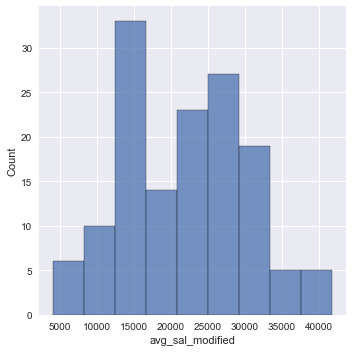

In [88]:
sal_displot = sns.displot(df_numeric['avg_sal_modified'])


The plot looks almost bi-modal, that is appears to have almost 2 peaks. It might be better if we can look at a line graph superimposed on top of this. For this we can use distplot in Seaborn. (Distplot is currently deprecated and will be removed in next Seaborn release, but we can use it for the time being, as it best represents what we are after.)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


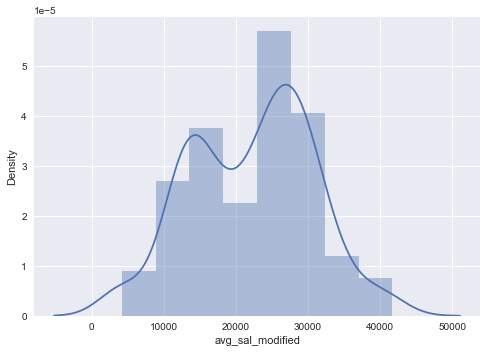

In [89]:
sal_distplot = sns.distplot(df_numeric['avg_sal_modified'])

As expected, the graph has a somewhat Gaussian appearance and looks continuous. I suspect that there are some high values which are overpowering small values. We can plot a matplotlib histogram and scale down the avg_sal_modified column using log 10.

(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8., 14., 11.,  0.,
        14.,  6., 21., 24., 18.,  5.,  5.]),
 array([3.61978876, 3.6698043 , 3.71981984, 3.76983538, 3.81985093,
        3.86986647, 3.91988201, 3.96989755, 4.0199131 , 4.06992864,
        4.11994418, 4.16995972, 4.21997526, 4.26999081, 4.32000635,
        4.37002189, 4.42003743, 4.47005298, 4.52006852, 4.57008406,
        4.6200996 ]),
 <BarContainer object of 20 artists>)

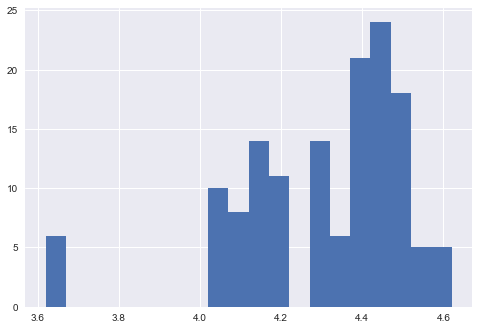

In [90]:
plt.hist(np.log10(df_numeric['avg_sal_modified'].values),bins = 20)

Our suspicion has been proved correct and there are truly some low values. However, as can be seen on our earlier outlier removal step, we have already removed lower 1 percentile values, so instead of removing these and inject bias, we will leave them in the dataset and proceed to compare all the numeric columns with each other and see if there is an obvious trend between salary and other factors.

For this we can use Seaborn's pairplot graph which is used for plotting relationship between 2 numeric datatypes. As we have 5 numeric columns in our df_numeric dataframe, it generates a 5X5 plot.

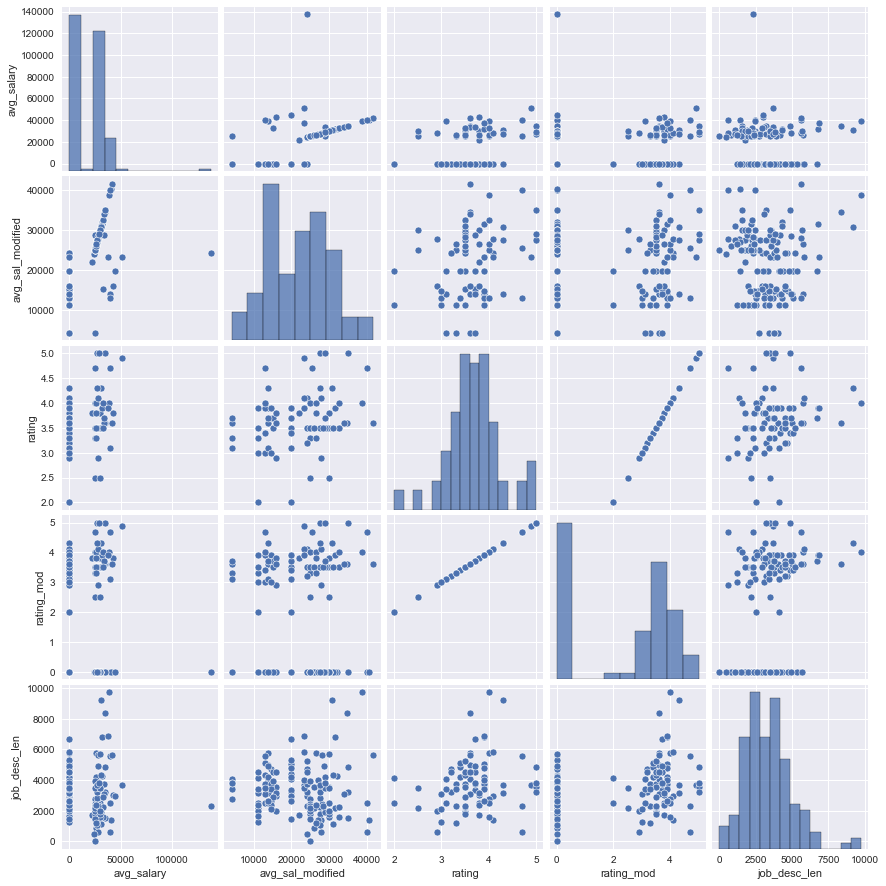

In [91]:
dfsal_pair= sns.pairplot(df_numeric)


This is an interesting plot and I can instantly notice a few pecularities. 
1. For starters, we can ignore the relation between rating and rating_mod as they are similar to each other with one being derived from another and therefore showing a high correlation.

2. The plot (2,1) that is rating versus job_desc_len and plot (3,1) that is rating_mod versus job_desc_len, should be similar, as per our previous point, but it seems that the second plot looks more dense which is owing to imputing the np.nan with zero. As we have created a categorical column rating_bin, it would be interesting to look at that on its own to see if this has caused the values to have scaled up, that is converting np.nan to zero to 'Unknown'. For this particular plot, let us ignore rating_mod completely (for the time being) and instead check out column rating and its relationship with others.

3. Relooking at the plot (2,1) that is rating versus job_desc_len, the plot is concentrated in the middle and then disperses towards right. This somewhat suggests that higher rated companies write longer job descriptions.

4. Plot(4,4) that is job_desc_len versus avg_sal_modified follows the same pattern as the previous plot discussed, but we can be more confident that whenever the job description is longer, the salary being offered is higher. An explanation to this could be that higher salaried jobs are looking for far higher number of skills which increase the job description length. It will be interesting to see if there are any specific job types like analysts, developers, Phd level jobs which always have higher job lengths. We will be checking this later on when we check numeric data with categorical columns.

Let us plot the correlation matrix to see 

In [100]:
df_numeric[['rating','avg_sal_modified','job_desc_len']].corr()

rating  avg_sal_modified  job_desc_len
rating              1.00              0.25          0.19
avg_sal_modified    0.25              1.00         -0.02
job_desc_len        0.19             -0.02          1.00

We can create a heatmap as well and we can straightaway see, that 'avg_sal_modified' and 'rating' are somewhat related

<AxesSubplot:>

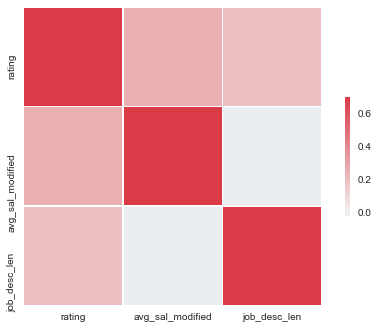

In [101]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df_numeric[['rating','avg_sal_modified','job_desc_len']].corr()
            ,vmax=.7,center=0,cmap = cmap
            ,square=True,linewidth=.4,cbar_kws={"shrink": .4})

Let us explore further, the relation between job_desc_len and avg_sal_modified columns. We can use Seaborn's jointplot for this which allows us to plot individual distributions of both the numeric variables along with the scatter plot between them.

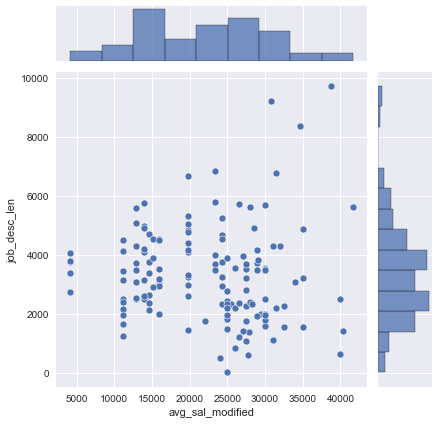

In [92]:
job_sal = sns.jointplot(x = 'avg_sal_modified',y='job_desc_len',data = df_numeric )

So from the jointplot above we can establish 2 things - 
1. Looking at the scatterplot, jobs with higher salaries can have any length of job description, however, if the job description length IS high then it is most likely that the job will be well paid.
2. Looking at the histogram, this situation is partially confirmed- the avg_sal_modified has a faint right tail, which means there are few high paid graduate jobs. If we rotate the job_desc_len histogram, anti-clockwise to 90 degrees, it is apparent that this plot has left tails, which are well defined which means, barring a few job adverts, most have a certain sized advert.



I would be interested in exploring further, the kind of companies etc which are offering high salaries with small job adverts. It is mostly likely that these could be phishing adverts trying to smoke out potential candidates by tantalising them with high salary. We can check this further on and also see if these job desription include any of the skill sets that we have created columns for like engineer, developer etc.

Before we move on to exploring categorical data, let us quickly compare the rating_mod and avg_sal_mod columns with their originals. We can use boxplot for this as it will show any change in outliers and if the median values have shifted, pulling both the quartiles in either direction. We can start with 'rating' and 'rating_mod'

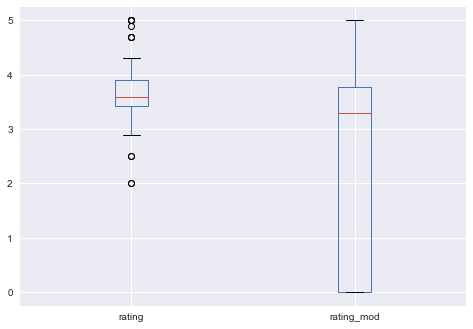

In [93]:
rat_box = df_numeric.boxplot(column = ['rating','rating_mod'])

In the original column 'rating', it looks like the median was around 3.5 with lower and upper outliers. By replacing nan with zeros, in rating_mod, the median has been pulled down as the number of zeros has gone up. This is also evident in large number of values below the median. This shift has altered the inter quartile length(IQR) which has basically absorbed the upper outliers as they are now within the 1.5 times the IQR.


I am now confident that it was the right decision to create bins out of this column, and by clubbing all zeros under the 'Unknown' bin option. This has several advantages, first it will allow us to still include the rows with unknown or zero ratings in the model. It will help establish the kind of companies which do not have any ratings, which in my estimation are probably small niche or start up companies or small recruitment firms. Generally, it is not advised to create bins out of small continuous variable (XXX) however in this instance it should not impact our model as the ratings only increment in halves for this column and that too , to only 1 decimal place, for example 2, 2.5, 3 etc and therefore any loss of information is negligible. Also by creating 4 bins, we have reduced the degrees of freedom which means our model is less unpredictable as the variability of the dataset has been reduced.

Let us now compare 

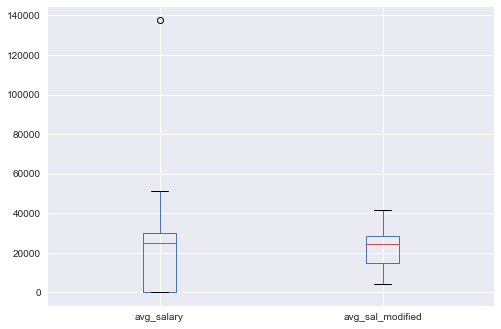

In [94]:
sal_box = df_numeric.boxplot(column = ['avg_salary','avg_sal_modified'])

In the original avg_salary, there were several blanks that were replaced with zero at data preparation phase. That is evident in how the boxplot is pulled down and there is an outlier as well. Multiple-imputation technique has balanced the data without skewing in either of the direction whilst getting rid of the outlier. Note that the median has not moved much and that is because we used average within a job type to evaluate replacement values. For instance, average salaries of analysts was used to replace missing average salary of jobs with this information missing. 

I am satisfied that the imputation of average salary column was the right step to take as values estimated are not out of bounds and outlier has been removed by checking through the 99th and 1st percentile, instead of using a specific number. Also, it has prevented us from excluding majority of the data. I have to re-iterate here, that the aim of the project is to identify most desirable skill sets amongst graduates and the salary column is for sort of identifying and labelling these jobs but the target is still to extract the skills from the column 'description' by using an NLP model, and by using the imputation technique we are still able to hold on to these rows with 'description' data , even if they were missing the salary data.

We can also quickly check the 'job_desc_column' using the box plot

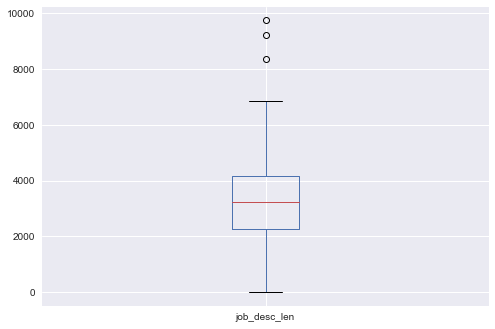

In [95]:
jobdesc_box = df_numeric.boxplot(column = ['job_desc_len'])

This box plot is just as we expected from the jointplot between 'avg_sal_modified' and 'job_desc_length' where we had said that it looks like most of the jobs have average sized job descriptions with some high paying jobs having lot longer than average job description. This is visually proved by this boxplot, as we can see the median is sitting perfectly in the middle and there are some large outliers as expected.

# Categorical columns and their relation with numeric columns

First let us create 3 separate dataframes. This is so we can separate out company specific columns like title, job_type, company name and two other data sets with skills and behavioural criteria. Note that all the data sets include numeric data, and this is intentional so I can see their relationship between each other and if there is any trend between them.

In [112]:
df_cat_company = df_sal[['title', 'company','job_type'
                         , 'job_desc_len', 'avg_val','avg_sal_modified', 'rating_mod','rating_bin', 'city_bin']]

df_cat_skill = df_sal[['skill_medical','skill_science','skill_python','skill_msoffice',
                     'skill_cloudtech','skill_webdev','skill_databases','skill_testing','skill_finance'
                       ,'job_desc_len', 'avg_val','avg_sal_modified', 'rating_mod','rating_bin', 'city_bin']]

df_cat_behv = df_sal[['behv_motivated','behv_competitive','behv_analytical'
                      ,'job_desc_len', 'avg_val','avg_sal_modified', 'rating_mod','rating_bin', 'city_bin']]


We can start by showing a boxplot and plotting discrete variable like 'city_bin' against a continuous variable like 'avg_sal_modified'

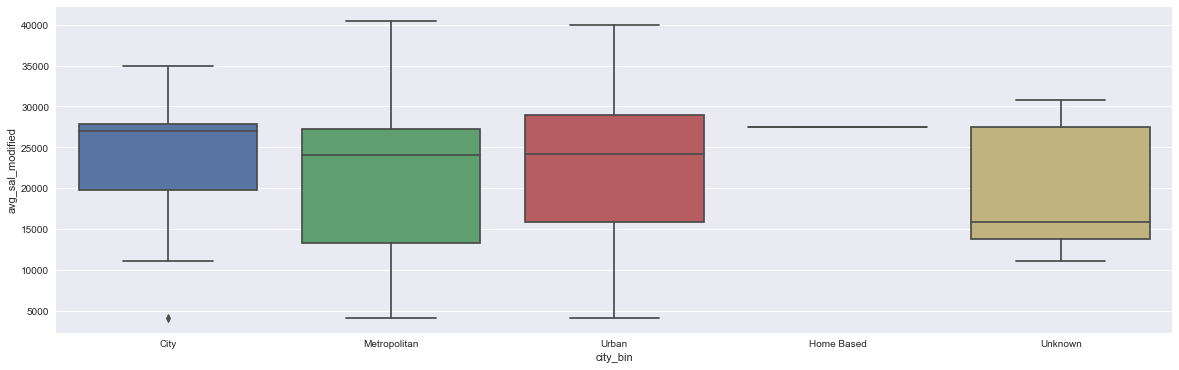

In [173]:
plt.figure(figsize=(20,6))
sal = sns.boxplot(x='city_bin',y ='avg_sal_modified',data = df_sal)

There are not many rows for Homebased, as can be seen. The missing location data is really apparent in this plot. The bulk of the salaries are being offered by jobs outside the big cities and the 4 metropolitan cities in UK, namely, London, Birmingham, Manchester and Edinburgh. It is interesting to see that despite Metropolitans offering more higher average salaries, the companies based in smaller towns that is Urban are offering far more varied average salaries which can be seen by its median not as close to the 3rd quartile. The jobs based in some of the 'City' are not as many, but the top wages are even few and far between gauging by the small 3rd quartile. Also, for 'City' there is an outlier which is too low and has not been handled as it could still be within range of the specific 'job_type'- the column that we had used for handling outliers for 'avg_sal_modified'.

The boxplot is a good representation, but I would like to see where each of the data point lies, so let us plot the same data using Seaborn's strip plot and it confirms our observation.

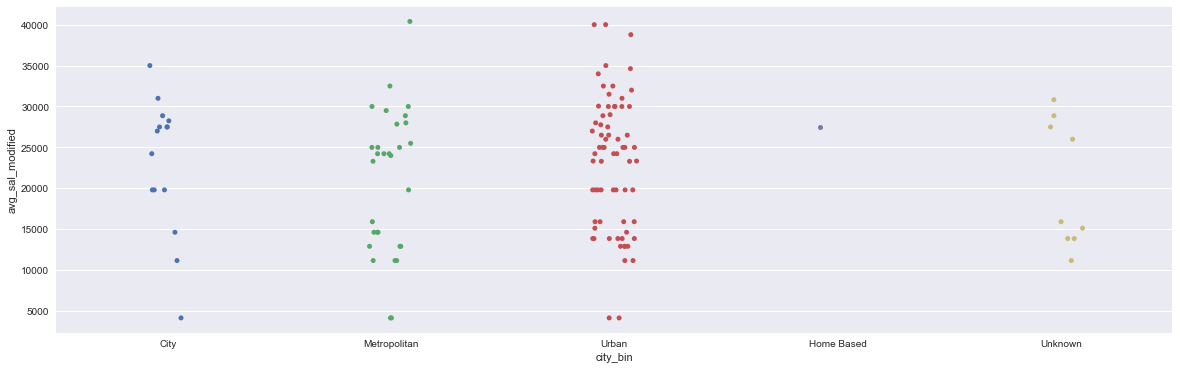

In [175]:
plt.figure(figsize=(20,6))
sal = sns.stripplot(x='city_bin',y ='avg_sal_modified',data = df_sal)

Lets plot a boxplot for 'rating_bin' against 'avg_sal_modified' .

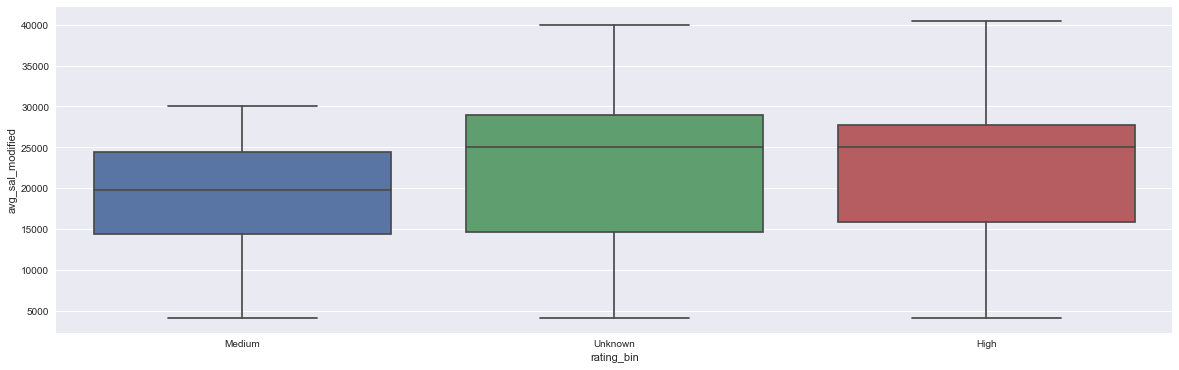

In [118]:
plt.figure(figsize=(20,6))
sal = sns.boxplot(x='rating_bin',y ='avg_sal_modified',data = df_sal)

It seems that for 'rating_bin' there are no ratings below 2.5 and hence no boxplot for option 'Low'. This is understandable as many online platforms practice 'threshold style' rating method, where very low ratings are not displayed, probably to prevent end users from having any prejudice against using a company with low rating. Based on this, I believe, that we can update the function XXX to replace nan or missing ratings with 2.5 and class them as 'Low' and remove the 'Unknown' category altogether.  

Now that we have checked how some of the categorical columns fair against 'avg_sal_modified' column, we can plot bar plot to count occurrances of some of these categorical columns.

Here we are plotting bar graph for 'company', 'job_type','rating_bin', 'city_bin'. Note as Company is a high cardinality column, I am only showing top 20 counts, which should be suffient for the rest of the columns

graph for company: total = 20


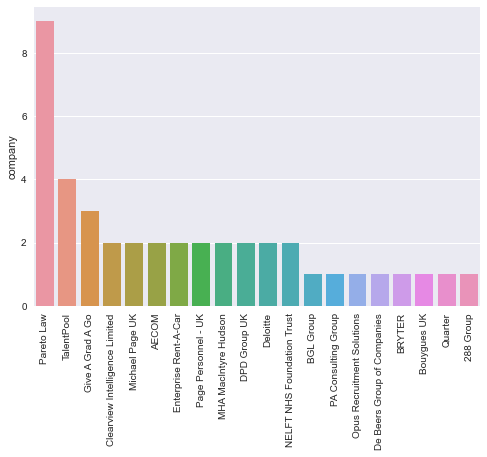

graph for job_type: total = 13


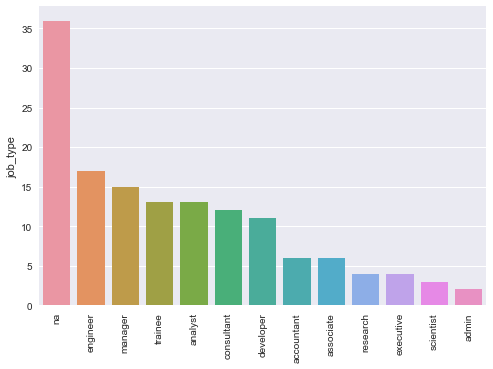

graph for rating_bin: total = 3


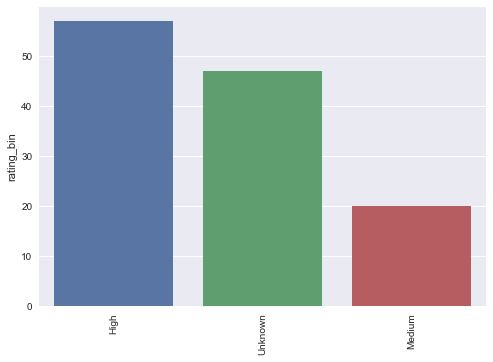

graph for city_bin: total = 5


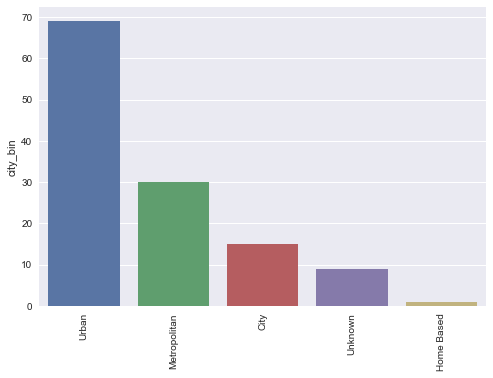

In [176]:
for i in df_cat_company[['company', 'job_type','rating_bin', 'city_bin']]:
    categ_num = df_sal[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(categ_num)))
    plot = sns.barplot(x=categ_num.index, y = categ_num)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()

Some key observations of the plots
'company', 'job_type','rating_bin', 'city_bin'

1. 'company' - Pareto law is the one advertising most jobs.There is a fair mix of companies along with recruiters (Michael Page) and health like NHS advertising too.
2. 'job_type' - Ignoring 'na', engineer jobs are the most being advertised. Its surprising to see so many 'manager' jobs for graduates.
3. 'rating_bin' - companies with high rating, 3.5 and above are advertising the most.
4. 'city_bin' - as previously discussed, jobs within the Urban areas far outweigh the jobs in metros and big cities.

We can repeat the same step and now plot skills on a bar plot.

graph for skill_medical: total = 2


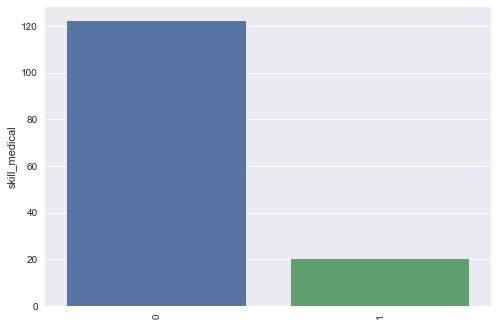

graph for skill_science: total = 2


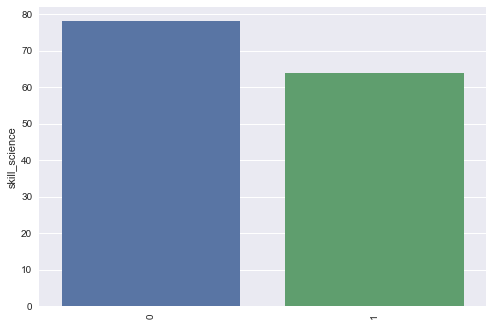

graph for skill_python: total = 2


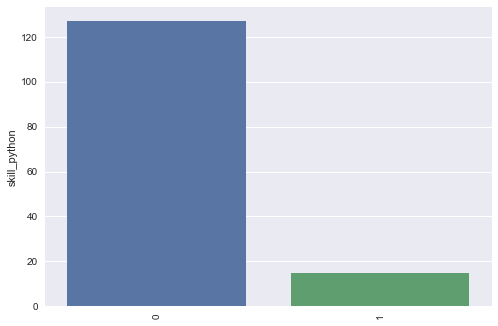

graph for skill_msoffice: total = 2


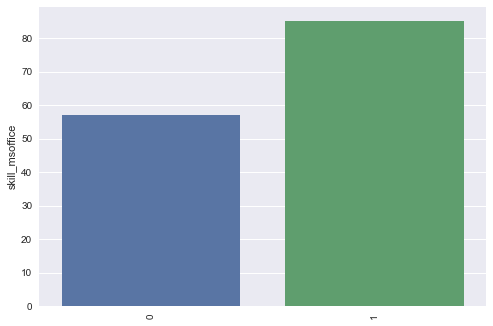

graph for skill_cloudtech: total = 2


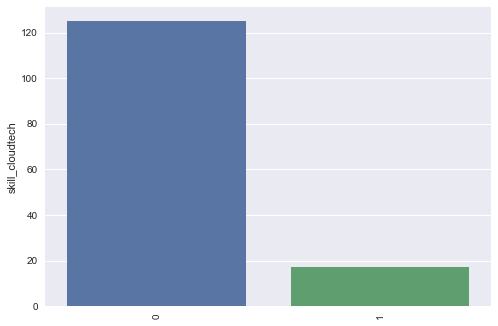

graph for skill_webdev: total = 2


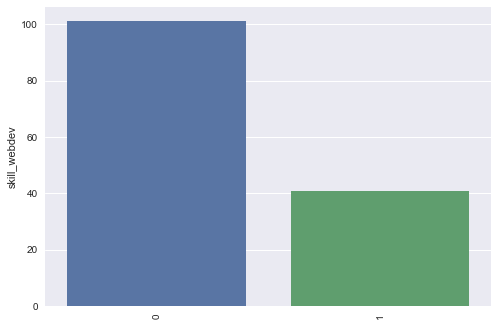

graph for skill_databases: total = 2


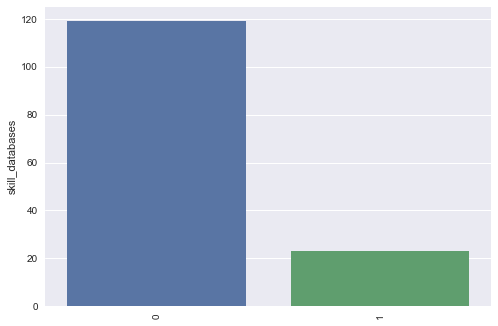

graph for skill_testing: total = 2


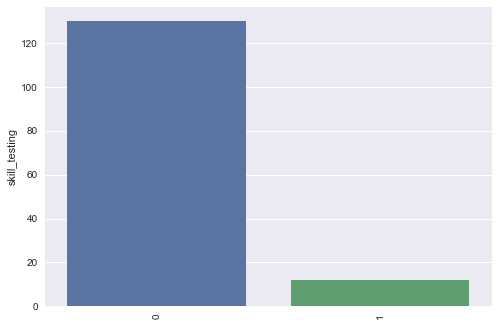

graph for skill_finance: total = 2


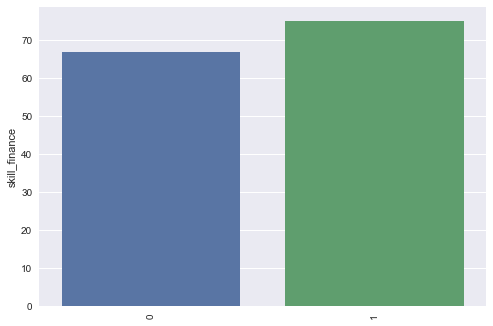

In [177]:
for i in df_cat_skill[['skill_medical','skill_science','skill_python','skill_msoffice',
                     'skill_cloudtech','skill_webdev','skill_databases','skill_testing','skill_finance']]:
    categ_num = df_cat_skill[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(categ_num)))
    plot = sns.barplot(x=categ_num.index, y = categ_num)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()

Just looking at the graph, we can see that Microsoft office seems to be most asked for skillset by employers, followed by finance and science related subjects. We will be creating pivot with these skills and job_type and plot them with 'avg_sal_modified' to see what the salary being offered for Microsoft office is.

And now lets plot behavioural skills

graph for behv_motivated: total = 2


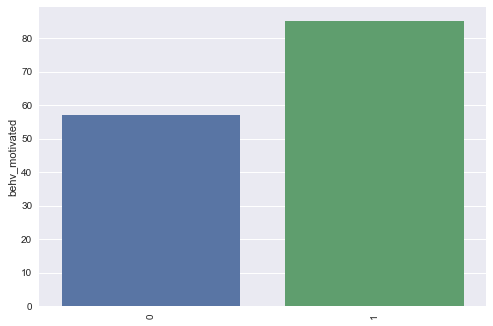

graph for behv_competitive: total = 2


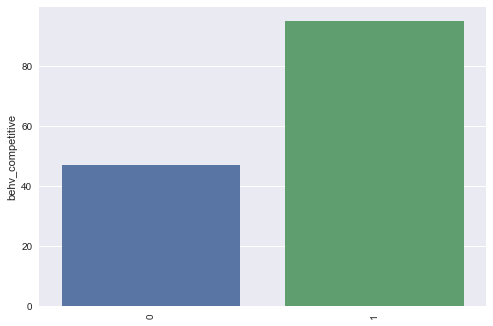

graph for behv_analytical: total = 2


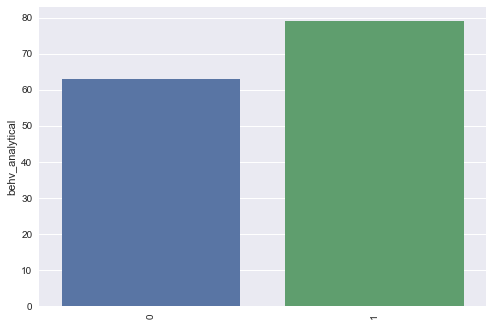

In [178]:
for i in df_cat_behv[['behv_motivated','behv_competitive','behv_analytical']]:
    cat_num = df_cat_behv[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    plot = sns.barplot(x=categ_num.index, y = cat_num)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()

In general, the word 'competitive' always had negative connotation associated with it, but it seems that the present day employers do admire that trait and are increasingly asking for it, just like other characteristics like being motivated and having an analytical bent of mind.
Being competitive and motivated despite not being tangible skillsets, colleges and universities can definitely look into creating this type of atmosphere, especially if it makes a candidate more employable.

Now, we can create a pivot and plot some or most of these categorical variables as columns and numeric variables as values to check. First step is to turn on display max rows, so the whole pivot can be seen

In [134]:
pd.set_option('display.max_rows',None)

In [186]:
pd.pivot_table(df_sal,index = ['job_type','rating_bin','city_bin']\
                               ,values = ['avg_sal_modified','job_desc_len'])\
                               .sort_values(['avg_sal_modified','job_desc_len','rating_bin','job_type','city_bin']
                                            , ascending = [False,False,False,False,False])

avg_sal_modified  job_desc_len
job_type   rating_bin city_bin                                    
scientist  High       Metropolitan          32500.00       1559.00
associate  Unknown    Urban                 32000.00       4289.00
consultant Unknown    City                  31000.00       3583.50
developer  Unknown    Urban                 31000.00       1580.33
na         Unknown    Unknown               30831.00       9207.00
admin      Medium     Urban                 30000.00       3509.00
                      Metropolitan          30000.00       1575.00
executive  High       Metropolitan          28875.00       4179.00
           Unknown    City                  28875.00       3706.00
           High       Unknown               28875.00       3486.00
           Unknown    Urban                 28875.00       1923.00
na         High       Metropolitan          28283.62       3412.33
           Unknown    Urban                 28021.18       2486.40
trainee    Unknown    Metropolitan          27845.00       1362.00
analyst    Unknown    Urban                 27743.59       2641.00
           High       Urban                 27615.38       4421.00
developer  High       Urban                 27545.45       3331.33
analyst    High       City                  27500.00       3210.00
manager    High       Home Based            27500.00       2816.00
analyst    Medium     Urban                 27115.38       3397.50
na         High       Urban                 27039.90       3766.78
manager    Unknown    Metropolitan          25500.00       2335.00
na         High       City                  25123.28       2765.40
engineer   Unknown    Urban                 24435.29       2011.20
analyst    Medium     City                  24230.77       5233.00
                      Metropolitan          24230.77       4687.00
           High       Metropolitan          24230.77       3351.50
associate  High       Urban                 24150.88       3225.50
na         Unknown    City                  24029.10       2780.50
manager    Unknown    Urban                 23904.58       4901.25
scientist  Unknown    Urban                 23333.33       6324.50
associate  Medium     Urban                 23301.75       3979.00
           High       Metropolitan          23301.75       3477.00
na         Medium     Urban                 21106.15       2890.50
manager    High       Unknown               20961.08       4026.00
                      Metropolitan          20461.08       2603.00
trainee    Medium     Urban                 20182.15       3295.00
engineer   High       Urban                 19338.24       3186.50
           Unknown    Unknown               19338.24       1734.50
trainee    High       Urban                 18618.58       3486.00
consultant Unknown    Metropolitan          17944.44       3076.00
engineer   High       Metropolitan          17588.24       1818.00
consultant High       Urban                 16944.44       2572.33
manager    Medium     Urban                 15922.17       1983.00
           High       Urban                 15922.17       1983.00
research   Unknown    Urban                 15127.75       4542.00
           High       Unknown               15127.75       3902.00
developer  Medium     Metropolitan          14636.36       3425.00
           Unknown    Metropolitan          14636.36       3394.00
                      City                  14636.36       2635.00
trainee    High       Unknown               13864.31       4916.00
           Unknown    Urban                 13864.31       3285.50
                      Unknown               13864.31       2617.00
consultant Medium     Metropolitan          12916.67       5586.00
                      Urban                 12916.67       5082.00
           Unknown    Urban                 12916.67       3088.00
engineer   Medium     City                  11176.47       2508.00
           Unknown    Metropolitan          11176.47       1898.50
accountant High 

In the above pivot, we are sorting in descending order, first by 'avg_sal_modified' followed by 'job_desc_len' and the others. It shouild not come as a surprise that the top salary is being offered for Science skill set. The sort order for the columns can be changed above to see the complete interaction of the data. 

In additon, we can do a similar pivot, just to count occurrences of 'avg_sal_modified' against city_bin and job_type.

In [150]:
pd.pivot_table(df_sal,index = ['city_bin','job_type']\
               ,values = 'avg_sal_modified'\
               ,aggfunc = 'count')\
               .sort_values('avg_sal_modified', ascending = False)

avg_sal_modified
city_bin     job_type                    
Urban        na                        18
             trainee                    9
             analyst                    7
City         na                         7
Urban        engineer                   7
             manager                    6
Metropolitan na                         6
Urban        developer                  6
             consultant                 5
Metropolitan engineer                   4
Urban        associate                  4
Metropolitan consultant                 4
             manager                    3
             developer                  3
             analyst                    3
Urban        accountant                 2
Metropolitan accountant                 2
City         analyst                    2
Unknown      engineer                   2
Urban        scientist                  2
Unknown      manager                    2
City         consultant                 2
Unknown      trainee                    2
Urban        executive                  1
             research                   1
             admin                      1
City         accountant                 1
Unknown      research                   1
             na                         1
             executive                  1
Metropolitan scientist                  1
             executive                  1
             associate                  1
             admin                      1
Home Based   manager                    1
City         executive                  1
             engineer                   1
             developer                  1
Metropolitan trainee                    1

The top most value has a job_type of 'na', which means there are several jobs that we haven't been able to categorise and this is where the NLP model will play its part. It should be able to identify unique words within a corpus(in this instance each job description) which will be specific to that particular job. We have now prepared our data which we can use for feature selection by implementing Logistic Regression and Random Forest.

Before we finish, we can build 2 wordcloud visualisations. The first one, is based on the skills that we have identified. These skills are matched against the 'description' column and everytime there is a match the counter is incremented gainst that word count. Note thate all the words in 'description' column are tokenised into uni grams. This step is performed using nltk.tokenize module.

In [180]:
keep_list = []

keep_words = ['medic','bio','stem','math','chemist','physics','science','python','microsoft','office','excel','cloud','azure'
             ,'aws','.net','asp.net','html','java','javascript','sql','oracle','database','testing','finance','financial','account','risk'] 

for w in df.iterrows():
    tok = word_tokenize(w[1]['description'])
    for w in tok:
        if w.lower() in keep_words:
             keep_list.append(w)
                    


All the tokens are counted as per frequency which can be displayed in wordcloud. Here, is a list with the words and count of their occurrences. 

In [181]:
# All the tokens are counted as per frequency and then displayed

from collections import Counter

counter_words = Counter(keep_list)
print(counter_words.most_common(100))

[('financial', 62), ('office', 48), ('Science', 28), ('finance', 24), ('Excel', 23), ('Office', 21), ('Microsoft', 16), ('cloud', 16), ('testing', 15), ('risk', 14), ('Account', 14), ('Python', 14), ('science', 12), ('SQL', 11), ('Finance', 11), ('Cloud', 11), ('account', 10), ('Java', 9), ('database', 7), ('.Net', 7), ('Financial', 7), ('Physics', 5), ('JavaScript', 5), ('HTML', 4), ('AWS', 4), ('Azure', 3), ('excel', 3), ('Risk', 2), ('STEM', 2), ('Javascript', 1), ('Testing', 1), ('physics', 1), ('Oracle', 1)]


From wordcloud module, we import necessary libraries. The list of words generated above are strung together and passed to wordcloud instance.

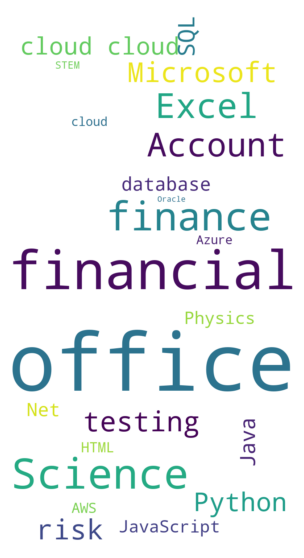

In [190]:
from wordcloud import WordCloud,ImageColorGenerator

text = " ".join([w for w in keep_list])
wc = WordCloud(background_color="white", random_state=1,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

This is a more impactful presentation of what we had earlier shown through bar graphs and plots. As discussed, Office, financial and Science seem to be the most desired skill. In second wordcloud presentation, instead of us providing skills to be matched against 'description' column, we follow the 'bag of words' method to create uni grams of all the words. Each of these are tokenized and aggregated to get a count. Care is taken to remove common 'stopwords' like 'we're', 'you're' etc before generating the count. In the code below I have also removed all words smaller than 3 letters to ensure a more unique collection of words. As previously, the words are strung together and spun into a wordcloud visualisation. As count of unique words will be quite high in this scenario and therefor I am only considering top 2000 words.

In [191]:
final_list = []

exclude_words = [',','.'] 

stop_words = stopwords.words('english')
# stopwords.append(exclude_words)

for w in df.iterrows():
    tok = word_tokenize(w[1]['description'])
    for w in tok:
        if w.lower() not in stop_words:
            if w.lower() not in exclude_words:
                if len(w) > 2:
                    final_list.append(w)
print(final_list)

['looking', 'recruit', 'two', 'University', 'graduates', 'join', 'ever-growing', 'company', 'Exactaform', 'Cutting', 'Tools', 'Ltd.The', 'roles', 'based', 'within', 'Operational', 'department', 'business', 'career', 'support', 'growth', 'business', 'mentored', 'senior', 'professional', 'grow', 'chosen', 'technical', 'discipline.About', 'Exactaform', 'British', 'manufacturer', 'Polycrystalline', 'Diamond', 'PCD', 'cutting', 'tools', 'part', 'global', 'supply', 'chains', 'biggest', 'names', 'Aerospace', 'Commercial', 'Military', 'Automotive', 'Motorsport', 'manufacturing', 'Suppliers', 'engineering', 'giants', 'like', 'BAE', 'Airbus', 'Boeing', 'Redbull', 'Mercedes', 'Based', 'Prologis', 'Park', 'custom-built', 'building', 'boasting', 'growth', 'year', 'year', 'continue', 'growth', 'attractive', 'position', 'two', 'enthusiastic', 'engineering', 'students', 'join', 'team.Our', 'programme', 'designed', 'graduates', 'exceptional', 'business', 'acumen', 'drive', 'ambition', 'excel.Our', 'org

As previously, the words are strung together and spun into a wordcloud visualisation. As count of unique words will be quite high in this scenario and therefor I am only considering top 2000 words. Due to the sheer volume, this particular wordcloud visual can take about 30 seconds to build.

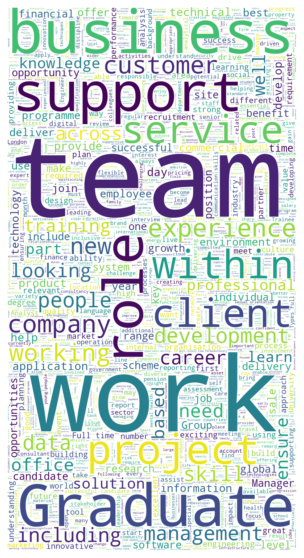

In [192]:
text = " ".join([w for w in final_list])
wc = WordCloud(background_color="white", random_state=1,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


Wordcloud has done a good job of showing at a glance 'What is desired?', however if we wish to quantify, how much a company/employer is willing to pay for specific skills then these need to be built into an NLP Machine learning model. 

# Conclusion:

    We have successfully completed the Exploratory data analysis and based on descriptive statistics have shown how some numeric, categorical and descriptive columns are related. We have plotted several graphs, pivots and eventually wordcloud visual to demonstrate our finding. For future work, we can apply feature selection to select best variables and use them to build an NLP project to identify the most desired skillsets based on the job descriptions and salaries being offered

# Bibliography

Mandler, P., 2020. The Crisis of the Meritocracy. 1st ed. Oxford: Oxford University Press, pp.123-125.

Mckinney, W., 2017. Python for data analysis. 2nd ed. Sebastopol,CA: O'Reilly Media Inc, pp.85-89,191-207,289-303.

Uk.indeed.com. 2021. Uk.indeed.com. [online] Available at: https://uk.indeed.com/jobs?q=graduate+%C2%A325,000&l=United+Kingdom&fromage=14&start [Accessed 25 August 2021].